In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField, ReciprocalField
from pbcpy.functionals import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
#

In [3]:
from pbcpy.local_functionals_utils import ThomasFermiEnergy, ThomasFermiPotential
from pbcpy.local_functionals_utils import vonWeizsackerEnergy, vonWeizsackerPotential

In [4]:
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

In [5]:
from pbcpy.semilocal_xc import PBE, LDA, XC, KEDF

In [6]:
from pbcpy.local_pseudopotential import NuclearElectron

In [7]:
from pbcpy.hartree import HartreeFunctional

# Non-scf electron density A=2.84

In [8]:
WT= PP('./PP/WT_KS/2.84/pot_ke.pp').read()

In [9]:
WT=WT.field

In [10]:
KS_H =PP('./PP/KS/2.84/H.pp').read()
KS_XC=PP('./PP/KS/2.84/XC.pp').read()
KS_ion=PP('./PP/KS/2.84/Vloc.pp').read()

In [11]:
#WGC_r_e =PP('./PP/WGC_KS/pot_eff.pp').read()
WGC =PP('./PP/WGC_KS/pot_ke.pp').read()
WGC=WGC.field

In [12]:
#LDA_r_e = PP('./PP/WTLDA_KS/pot_eff.pp').read()
LDA  = PP('./PP/WTLDA_KS/2.84/pot_ke.pp').read()
LDA=LDA.field

In [13]:
LDA0 =PP('./PP/WTLDA0_KS/pot_ke.pp').read()
LDA0=LDA0.field

In [14]:
rho=PP('PP/KS/2.84/rho.pp').read()
rho=rho.field

In [15]:
MGP =PP('PP/MGP_KS/2.84/pot_ke.pp').read()
MGP=MGP.field

In [16]:
KGAP4 =PP('PP/KGAP_KS/pot_ke.pp').read()
KGAP1=PP('PP/KGAP_KS/2.84/1/pot_ke.pp').read()
KGAP10=PP('PP/KGAP_KS/2.84/10/pot_ke.pp').read()
KGAP4=KGAP4.field
KGAP1=KGAP1.field
KGAP10=KGAP10.field

In [17]:
KS=-(KS_H.field + KS_XC.field + KS_ion.field)/2.0 + 5.3838/27.211396132

In [18]:
k=[]
w=[]
c=[]
l=[]
l0=[]
kg1=[]
kg4=[]
kg10=[]
m=[]
for i in range(0,36):
    k.append(KS[i,i,i,0])
    w.append(WT[i,i,i,0])
    c.append(WGC[i,i,i,0])
    l.append(LDA[i,i,i,0])
    kg1.append(KGAP1[i,i,i,0])
    kg4.append(KGAP4[i,i,i,0])
    kg10.append(KGAP10[i,i,i,0])
    l0.append(LDA0[i,i,i,0])
    m.append(MGP[i,i,i,0])

In [19]:
Ne = rho.integral()

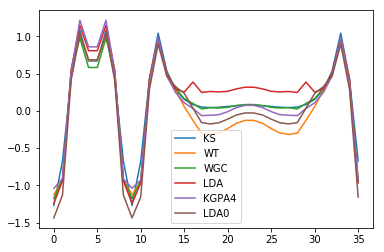

In [20]:
plt.plot(k,label='KS')
plt.plot(w,label='WT')
plt.plot(c,label='WGC')
plt.plot(l,label='LDA')
#plt.plot(kg1,label='KGAP1')
plt.plot(kg4,label='KGPA4')
plt.plot(l0,label='LDA0')
#plt.plot(m,label='MGP')
plt.legend()

# Kinetic electron in real/reciprocal space

## Test the pbcpy and ATLAS

In [21]:
WGC_KE=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WGC/pot_ke.pp').read()
WGC_sys=WGC_KE
WGC_KE=WGC_KE.field
WGC_KE=WGC_KE.fft()

In [22]:
gg=WGC_sys.field.grid.get_reciprocal().gg

In [23]:
WGC_g=WGC_KE*gg 

In [24]:
WGC_g=np.abs(WGC_g)

In [25]:
WGC_r_atlas=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WGC/pot_KE_r.pp').read()

In [26]:
WGC_r_atlas=WGC_r_atlas.field.fft()*4.0*np.pi
WGC_r_atlas=np.abs(WGC_r_atlas)

In [27]:
g=gg**(0.5)

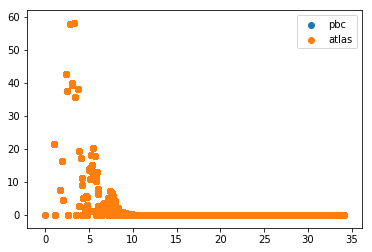

In [28]:
p1=plt.scatter(g,WGC_g)
p2=plt.scatter(g,WGC_r_atlas)
plt.legend((p1,p2),(u'pbc',u'atlas'))

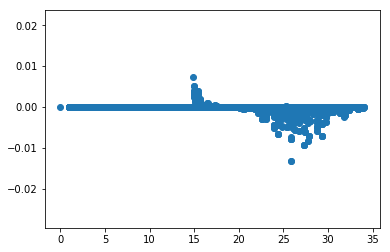

In [30]:
p2=plt.scatter(g,WGC_r_atlas-WGC_g)

# Anylysis the KS/OF-DFT results

In [31]:
KS_KE_g=KS.fft()
KS_KE_g= KS_KE_g *gg
KS_KE_g=np.real(KS_KE_g)

In [32]:
def rho_KE(pot):
    rho_KE = pot.field.fft()
    gg= pot.field.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.real(rho_KE)
    return rho_KE   

In [33]:
WT_r =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WT/pot_ke.pp').read()
WGC_r =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_WGC/pot_ke.pp').read()
KGAP_r=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_Kgap//pot_ke.pp').read()
LDA_r=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/Si_LDA//pot_ke.pp').read()

In [34]:
WGC_KE_g=rho_KE(WGC_r)
WT_KE_g=rho_KE(WT_r)
KGAP_KE_g=rho_KE(KGAP_r)
LDA_KE_g=rho_KE(LDA_r)

(0, 15)

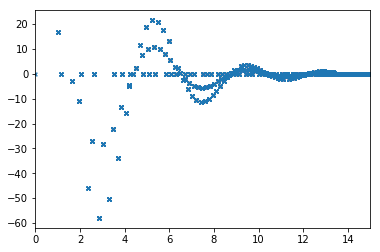

In [35]:
p1=plt.scatter(g,KS_KE_g,alpha=0.9,marker='x',s=14.0)
#p2=plt.scatter(g,WT_KE_g,s=12.0)
#p3=plt.scatter(g,WGC_KE_g,s=12.0)
#p4=plt.scatter(g,KGAP_KE_g,s=12.0)
#p5=plt.scatter(g,LDA_KE_g,s=12.0)

plt.xlim([0,15])
#plt.legend((),(u'KS',u'WT',u'WGC',u'KGAP',u'LDA'))


# SC Silicon

In [36]:
125.207657547356**(1.0/3.0)

5.002767235497082

In [37]:
5.002767235497082*0.529177208607388

2.647350400992845

### Fermi energy =7.4126 eV

In [38]:
H=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF/pot_H.pp').read()
H=H.field

In [39]:
H2=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TV/pot_H.pp').read()
H2=H2.field

In [40]:
XC=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF/pot_XC.pp').read()
XC=XC.field

In [41]:
Loc=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF/pot_ion.pp').read()
Loc=Loc.field

In [42]:
KS_SC=-1.0*(H + XC + Loc) + 7.4126/27.2113834279111

In [43]:
gg=H.grid.get_reciprocal().gg
KS_SC_g = KS_SC.fft()
KS_SC_r = (KS_SC_g*gg).ifft()
KS_SC_g = np.real(KS_SC_g * gg)
g=gg**0.5

In [44]:
def rho_KE(pot):
    rho_KE = pot.field.fft()
    gg= pot.field.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.real(rho_KE)
    return rho_KE 

In [45]:
WGC =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WGC/pot_ke.pp').read()
WT =PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WT/pot_ke.pp').read()
LDA= PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_LDA/pot_ke.pp').read()
KGAP = PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_Kgap/pot_ke.pp').read()

In [46]:
WGC_g=rho_KE(WGC)
WT_g=rho_KE(WT)
LDA_g=rho_KE(LDA)
KGAP_g=rho_KE(KGAP)

In [47]:
for i in range(len(WGC.ions)):
    WGC.ions[i].strf

In [48]:
WGC=WGC.field
WT=WT.field
LDA=LDA.field
KGAP=KGAP.field

In [49]:
k=[]
w=[]
c=[]
l=[]
kg=[]
kr=[]
for i in range(0,24):
    k.append(KS_SC[i,i,i,0])
    w.append(WT[i,i,i,0])
    c.append(WGC[i,i,i,0])
    l.append(LDA[i,i,i,0])
    kg.append(KGAP[i,i,i,0])
    kr.append(KS_SC_r[i,i,i,0])
k = np.asarray(k,dtype=np.float)
w = np.asarray(w,dtype=np.float)
c = np.asarray(c,dtype=np.float)
l = np.asarray(l,dtype=np.float)
kg = np.asarray(kg,dtype=np.float)
kr =np.asanyarray(kr,dtype=np.float)

/Users/wenhui/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


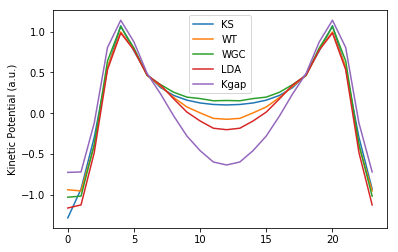

In [50]:
plt.plot(k,label='KS')
plt.plot(w,label='WT')
plt.plot(c,label='WGC')
plt.plot(l,label='LDA')
plt.plot(kg,label='Kgap')
plt.legend()
plt.ylabel('Kinetic Potential (a.u.)')
plt.savefig('fig/KE_potential_SC_Si.eps')

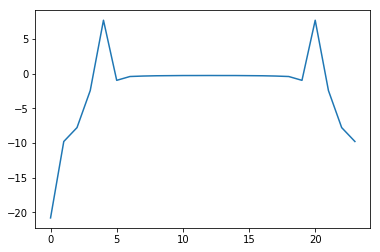

In [51]:
plt.plot(kr,label='KR')

In [52]:
g.shape

(24, 24, 24, 1)

(0, 18)

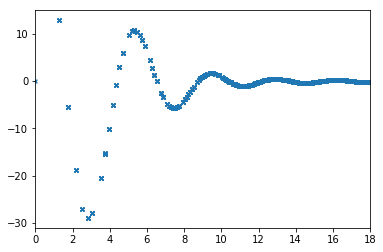

In [53]:
p1=plt.scatter(g,KS_SC_g,alpha=0.9,marker='x',s=14.0)

#p2=plt.scatter(g,WGC_g,s=12.0)
#p3=plt.scatter(g,WT_g,s=12.0)
#p4=plt.scatter(g,LDA_g,s=12.0)

plt.xlim([0,18])
#plt.legend((p1,p2,p3,p4),(u'KS',u'WGC',u'WT',u'LDA'))

#  Atom in the centern of cubic box

## Fermi enenrgy= 7.4126

In [54]:
def rho_KE(pot):
    rho_KE = pot.fft()
    gg= pot.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.real(rho_KE)
    return rho_KE 

In [55]:
def rho_KE_r(pot,sigma=0.0):
    rho_KE = pot.fft()
    gg = pot.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg*np.exp(-gg*sigma**2/4.0)
    rho_KE_r=rho_KE.ifft()
    return rho_KE_r

In [61]:
H_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/pot_H.pp').read()
H_c=H_c.field

In [62]:
XC_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/pot_XC.pp').read()
XC_c=XC_c.field

In [63]:
Loc_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/pot_ion.pp').read()
Loc_c=Loc_c.field

In [64]:
WT_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WT_c/pot_ke.pp').read()
WT_c=WT_c.field

In [65]:
WGC_c=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_WGC_c/pot_ke.pp').read()
WGC_c=WGC_c.field

In [66]:
KS_SC_c=-1.0*(H_c + XC_c + Loc_c) + 7.4126/27.2113834279111

In [192]:
#gg=H_c.grid.get_reciprocal().gg
#KS_SC_c_g = KS_SC_c.fft()
#KS_SC_c_g = np.abs(KS_SC_c_g * gg)
#g=gg**0.5

In [67]:
KS_SC_c_g=rho_KE(KS_SC_c)
KS_SC_r=rho_KE_r(KS_SC_c)
H_g=rho_KE(H_c)
H_r=rho_KE_r(H_c)
XC_g=rho_KE(XC_c)
XC_r=rho_KE_r(XC_c)
Loc_g=rho_KE(Loc_c)
Loc_r=rho_KE_r(Loc_c)
Loc_r_numcheck = rho_KE_r(Loc_c,sigma=0)
WGC_r=rho_KE_r(WGC_c)
WGC_g=rho_KE(WGC_c)
WT_r=rho_KE_r(WT_c)
WT_g=rho_KE(WT_c)

In [68]:
Loc_r.integral()

(2.6852457466739655e-14-3.5224280474398014e-28j)

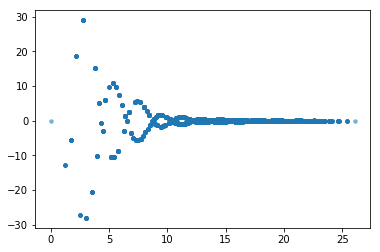

In [69]:
#p1=plt.scatter(g,KS_SC_g,marker='v',s=18.0,alpha=1.0)
p1=plt.scatter(g,KS_SC_c_g,marker='o',s=12.0,alpha=0.5)


In [74]:
diff=KS_SC_c + Loc_g

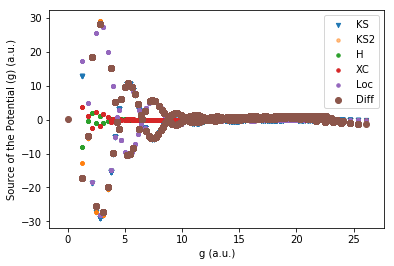

In [76]:
p1=plt.scatter(g,KS_SC_g,marker='v',s=18.0,alpha=1.0)
p2=plt.scatter(g,KS_SC_c_g,marker='o',s=12.0,alpha=0.5)
p3=plt.scatter(g,H_g,marker='o',s=12.0,alpha=1.0)
p5=plt.scatter(g,XC_g,marker='o',s=12.0,alpha=1.0)
p6=plt.scatter(g,Loc_g,marker='o',s=12.0,alpha=1.0)
p7=plt.scatter(g,diff)
plt.legend((p1,p2,p3,p5,p6,p7),(u'KS',u'KS2',u'H',u'XC',u'Loc',u'Diff'))
plt.xlabel('g (a.u.)')
plt.ylabel('Source of the Potential (g) (a.u.)')
#plt.savefig()

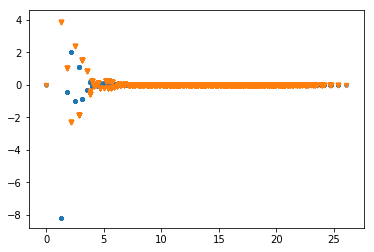

In [77]:
p3=plt.scatter(g,H_g,marker='o',s=12.0,alpha=1.0)
p5=plt.scatter(g,XC_g,marker='v',s=19.0,alpha=1.0)
#p6=plt.scatter(g,Loc_g,marker='o',s=12.0,alpha=1.0)
#plt.legend((p3,p5),(u'H',u'XC'))

In [78]:
nnr=24
h=np.arange(nnr,dtype='float')
xc=np.arange(nnr,dtype='float')
ion=np.arange(nnr,dtype='float')
ks=np.arange(nnr,dtype='float')
wt=np.arange(nnr,dtype='float')
wgc=np.arange(nnr,dtype='float')
for i in range(0,24):
    h[i]=H_r[i,i,i,0]
    xc[i]=XC_r[i,i,i,0]
    ion[i]=Loc_r[i,i,i,0]
    ks[i]=KS_SC_r[i,i,i,0]
    wt[i]=WT_r[i,i,i,0]
    wgc[i]=WGC_r[i,i,i,0]

/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykern

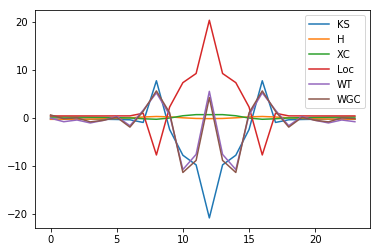

In [79]:
plt.plot(ks,label='KS')
plt.plot(h,label='H')
plt.plot(xc,label='XC')
plt.plot(ion,label='Loc')
plt.plot(wt,label='WT')
plt.plot(wgc,label='WGC')

#plt.ylim([-5,5])
plt.legend()

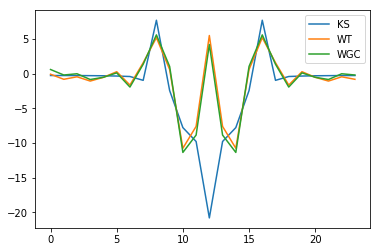

In [80]:
plt.plot(ks,label='KS')
plt.plot(wt,label='WT')
plt.plot(wgc,label='WGC')
plt.legend()

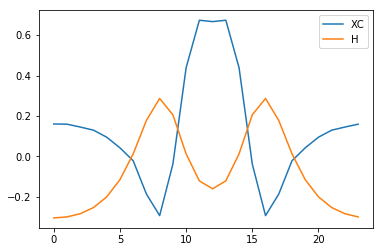

In [81]:
plt.plot(xc,label='XC')
plt.plot(h,label='H')
plt.legend()

In [84]:
rho=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Si/SC/Si_TF_c/rho.pp').read()
rho=rho.field.fft()
rho=np.real(rho)

(0, 6)

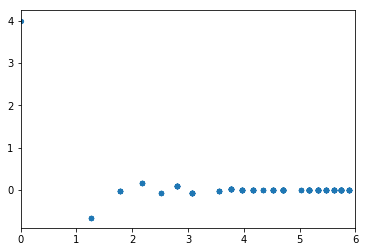

In [86]:
p1=plt.scatter(g,rho,marker='o',s=18.0,alpha=1.0)
plt.xlim([0,6])

In [204]:
-4.15630876*27.2119/2

-56.550529173122

# SC Al Fermi Energy=5.2447 eV

In [8]:
H=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT/pot_H.pp').read()
H=H.field

In [9]:
XC=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT/pot_XC.pp').read()
XC=XC.field

In [10]:
ION=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT/pot_ion.pp').read()
ION=ION.field

In [11]:
WT=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT/pot_ke.pp').read()
WT=WT.field

In [12]:
WT_s=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT_scf/pot_ke.pp').read()
WT_s=WT_s.field

In [13]:
rho=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT/rho.pp').read()
rho=rho.field

In [14]:
MGP=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_MGP/pot_ke.pp').read()
MGP=MGP.field

In [15]:
MGP_s=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_MGP_scf/pot_ke.pp').read()
MGP_s=MGP_s.field

In [17]:
def rho_KE(pot):
    rho_KE = pot.fft()
    gg= pot.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.real(rho_KE)
    return rho_KE 

In [18]:
def rho_KE_r(pot,sigma=0.0):
    rho_KE = pot.fft()
    gg = pot.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE_r=rho_KE.ifft()
    return rho_KE_r

In [19]:
KS=-1.0*( H + XC + ION) + 5.2447/27.211396132

In [21]:
g=KS.grid.get_reciprocal().gg
g=np.sqrt(g)

In [22]:
KS_r=rho_KE_r(KS)
KS_g=rho_KE(KS)

In [23]:
WT_r=rho_KE_r(WT)
WT_g=rho_KE(WT)

In [24]:
WT_s_r=rho_KE_r(WT_s)
WT_s_g=rho_KE(WT_s)

In [25]:
MGP_s_r=rho_KE_r(MGP_s)
MGP_s_g=rho_KE(MGP_s)

In [26]:
MGP_r=rho_KE_r(MGP)
MGP_g=rho_KE(MGP)

In [27]:
H_r=rho_KE_r(H)
H_g=rho_KE(H)
XC_r=rho_KE_r(XC)
XC_g=rho_KE(XC)
ION_r=rho_KE_r(ION)
ION_g=rho_KE(ION)

In [34]:
nnr=24
h=np.arange(nnr,dtype='float')
xc=np.arange(nnr,dtype='float')
ion=np.arange(nnr,dtype='float')
ks=np.arange(nnr,dtype='float')
wt=np.arange(nnr,dtype='float')
KS_k=np.arange(nnr,dtype='float')
WT_k=np.arange(nnr,dtype='float')
WT_s_k=np.arange(nnr,dtype='float')
wt_s=np.arange(nnr,dtype='float')
rh=np.arange(nnr,dtype='float')
mgp=np.arange(nnr,dtype='float')
mgps=np.arange(nnr,dtype='float')
mgp_k=np.arange(nnr,dtype='float')
mgps_k=np.arange(nnr,dtype='float')
for i in range(0,24):
    h[i]=H_r[i,i,i,0]
    xc[i]=XC_r[i,i,i,0]
    ion[i]=ION_r[i,i,i,0]
    ks[i]=KS_r[i,i,i,0]
    wt[i]=WT_r[i,i,i,0]
    wt_s[i]=WT_s_r[i,i,i,0]
    KS_k[i]=KS[i,i,i,0]
    WT_k[i]=WT[i,i,i,0]
    WT_s_k[i]=WT_s[i,i,i,0]
    rh[i] = rho[i,i,i,0]
    mgp[i] =MGP_r[i,i,i,0]
    mgps[i]=MGP_s_r[i,i,i,0]
    mgp_k[i] =MGP[i,i,i,0]
    mgps_k[i]=MGP_s[i,i,i,0]

/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wenhui/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: ComplexWarn

## The effective electron of corresponding potential in [111] direction (Real space)

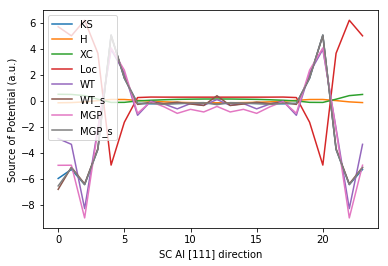

In [30]:

plt.plot(ks,label='KS')
plt.plot(h,label='H')
plt.plot(xc,label='XC')
plt.plot(ion,label='Loc')
plt.plot(wt,label='WT')
plt.plot(wt_s,label='WT_s')
plt.plot(mgp,label='MGP')
plt.plot(mgps,label='MGP_s')
#plt.plot(LDA,label='LDA')
plt.ylabel('Source of Potential (a.u.)')
plt.xlabel('SC Al [111] direction')
#plt.ylim([-5,5])
plt.legend()
plt.savefig('fig/Al_SC_Source.eps')

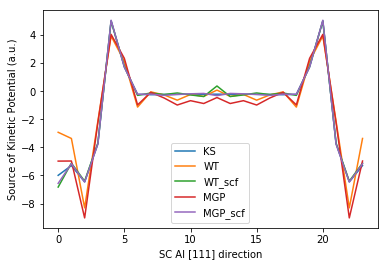

In [32]:
plt.plot(ks,label='KS')
plt.plot(wt,label='WT')
plt.plot(wt_s,label='WT_scf')
plt.plot(mgp,label='MGP')
plt.plot(mgps,label='MGP_scf')
plt.legend()
plt.ylabel('Source of Kinetic Potential (a.u.)')
plt.xlabel('SC Al [111] direction')
plt.savefig('fig/Al_SC_Source_KWM.eps')

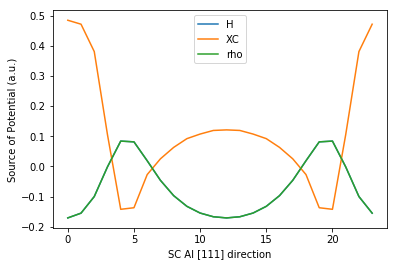

In [36]:
rho0=2.091632304623135E-002
plt.plot(h,label='H')
plt.plot(xc,label='XC')
plt.plot(4.0*np.pi*(rh-rho0),label='rho')
plt.legend()
plt.ylabel('Source of Potential (a.u.)')
plt.xlabel('SC Al [111] direction')
plt.savefig('fig/Al_SC_Source_HXC.eps')

## Real effective kinetic potentials in real space

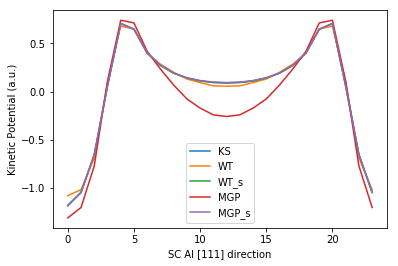

In [37]:
plt.plot(KS_k,label='KS')
plt.plot(WT_k,label='WT')
plt.plot(WT_s_k,label='WT_s')
plt.plot(mgp_k,label='MGP')
plt.plot(mgps_k,label='MGP_s')
#plt.xlim(3,22)
plt.ylabel('Kinetic Potential (a.u.)')
plt.legend()
plt.xlabel('SC Al [111] direction')
plt.savefig('fig/Al_SC_KEDF_KWS.eps')

## The effective electron of corresponding potential in g space

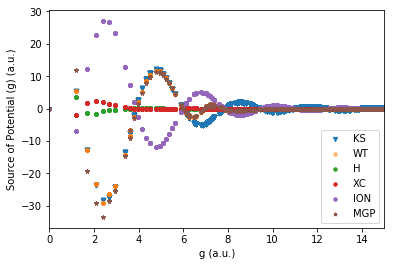

In [41]:
p1=plt.scatter(g,KS_g,marker='v',s=18.0,alpha=1.0)
p2=plt.scatter(g,WT_g,marker='o',s=12.0,alpha=0.5)
p3=plt.scatter(g,H_g,marker='o',s=12.0,alpha=1.0)
p4=plt.scatter(g,XC_g,marker='o',s=12.0,alpha=1.0)
p5=plt.scatter(g,ION_g,marker='o',s=12.0,alpha=1.0)
p6=plt.scatter(g,MGP_g,marker='*',s=12.0,alpha=1.0)

plt.xlim(0,15)
plt.legend((p1,p2,p3,p4,p5,p6),(u'KS',u'WT',u'H',u'XC',u'ION',u'MGP'))
plt.ylabel('Source of Potential (g) (a.u.)')
plt.xlabel('g (a.u.)')
plt.savefig('fig/Al_sourcetest.eps')

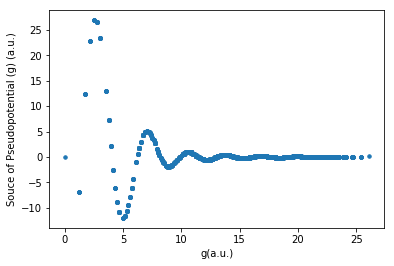

In [107]:
p1=plt.scatter(g,ION_g,marker='o',s=12.0,alpha=1.0)
plt.ylabel('Souce of Pseudopotential (g) (a.u.)' )
plt.xlabel('g(a.u.)')
plt.savefig('fig/Al_PP_g.eps')

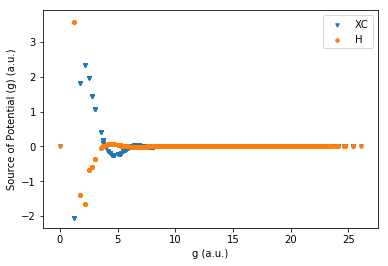

In [108]:
p1=plt.scatter(g,XC_g,marker='v',s=12.0,alpha=1.0)
p2=plt.scatter(g,H_g,marker='o',s=12.0,alpha=1.0)
plt.legend((p1,p2),(u'XC',u'H'))
plt.ylabel('Source of Potential (g) (a.u.)')
plt.xlabel('g (a.u.)')
#plt.xlim(0,8)
plt.savefig('fig/Al_HXC_g.eps')

# SC Al with a=2.2/4.0

In [109]:
ION_22=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT_2.2/pot_ion.pp').read()
ION_22=ION_22.field

In [110]:
ION_4=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/Al_WT_4/pot_ion.pp').read()
ION_4=ION_4.field

In [111]:
g2=ION_22.grid.get_reciprocal().gg
g2=np.sqrt(g2)

In [112]:
g4=ION_4.grid.get_reciprocal().gg
g4=np.sqrt(g4)

In [113]:
g2.shape

(18, 18, 18, 1)

In [114]:
g4.shape

(36, 36, 36, 1)

In [115]:
def rho_KE(pot):
    rho_KE = pot.fft()
    gg= pot.grid.get_reciprocal().gg
    rho_KE=rho_KE*gg
    rho_KE=np.real(rho_KE)
    return rho_KE 

In [116]:
ION_22_r=rho_KE_r(ION_22)
ION_22_g=rho_KE(ION_22)
ION_4_r=rho_KE_r(ION_4)
ION_4_g=rho_KE(ION_4)

In [117]:
ION_22_g.shape

(18, 18, 18, 1)

In [118]:
ION_4_g.shape

(36, 36, 36, 1)

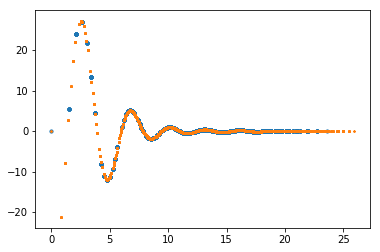

In [119]:
#p1=plt.scatter(g,ION_g,marker='v',s=12.0,alpha=1.0)
p2=plt.scatter(g2,ION_22_g,s=10)
p3=plt.scatter(g4,ION_4_g,marker='*',s=4)

## Larger Ecut

In [120]:
ION_180=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/22_180/vloc.pp').read()
ION_180=ION_180.field/2.0

In [121]:
ION_400=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/22_400/vloc.pp').read()
ION_400=ION_400.field/2.0

In [122]:
g180=ION_180.grid.get_reciprocal().gg
g180=np.sqrt(g180)
g180.shape

(36, 36, 36, 1)

In [123]:
g400=ION_400.grid.get_reciprocal().gg
g400=np.sqrt(g400)
g400.shape

(54, 54, 54, 1)

In [124]:
g2.shape

(18, 18, 18, 1)

In [125]:
ION_180_g=rho_KE(ION_180)
ION_400_g=rho_KE(ION_400)

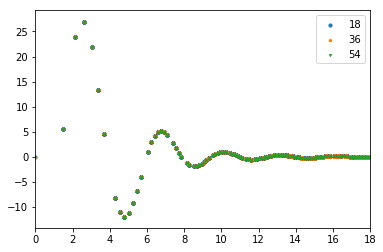

In [126]:
p1=plt.scatter(g2,ION_22_g,s=10)
#p2=plt.scatter(g4,ION_4_g,marker='*',s=4)
p2=plt.scatter(g180,ION_180_g,marker='*',s=8)
p3=plt.scatter(g400,ION_400_g,marker='v',s=4)
plt.xlim(0,18)
plt.legend((p1,p2,p3),(u'18','36','54'))

In [127]:
ION_t=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/test/vloc.pp').read()
ION_t=ION_t.field/2.0

In [128]:
gt=ION_t.grid.get_reciprocal().gg
gt=np.sqrt(gt)
gt.shape

(45, 36, 40, 1)

In [129]:
ION_t_g=rho_KE(ION_t)

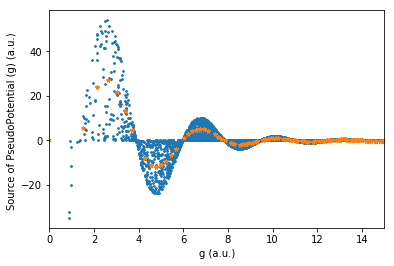

In [130]:
p1=plt.scatter(gt,ION_t_g,marker='o',s=2)
p2=plt.scatter(g2,ION_22_g,marker='*',s=10)

plt.xlim(0,15)
plt.xlabel('g (a.u.)')
plt.ylabel('Source of PseudoPotential (g) (a.u.) ')
plt.savefig('fig/Al_2PP_Source.eps')

##  PAW local peusopotential

In [131]:
ION_t=PP('/Users/wenhui/Research/Rutgers/ATLAS_MI/Benchmarks/do/Al/SC/test2/vloc.pp').read()
ION_t=ION_t.field/2.0

In [132]:
gt=ION_t.grid.get_reciprocal().gg
gt=np.sqrt(gt)
gt.shape

(36, 36, 36, 1)

In [133]:
ION_t_g=rho_KE(ION_t)

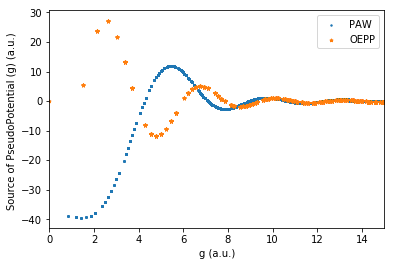

In [134]:
p1=plt.scatter(gt,ION_t_g,marker='o',s=2)
p2=plt.scatter(g2,ION_22_g,marker='*',s=10)
plt.legend((p1,p2),('PAW','OEPP'))
plt.xlim(0,15)
plt.xlabel('g (a.u.)')
plt.ylabel('Source of PseudoPotential (g) (a.u.) ')
plt.savefig('fig/Al_PAW_Source.eps')